# Kaggle - Titanic 

## Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
sns.set_style(style='darkgrid')

## Datasets

In [5]:
train = pd.read_csv('datasets/titanic/train.csv')
test = pd.read_csv('datasets/titanic/test.csv')
gender = pd.read_csv('datasets/titanic/gender_submission.csv')

In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [29]:
X_train, y_train = train.drop(columns='Survived'), train.Survived

## EDA 

<img src="resources/titanic_col.png" height=1 />

### Variable Notes

__pclass__: A proxy for socio-economic status (SES)
<ul>
    <li>1st = Upper</li>
    <li>2nd = Middle</li>
    <li>3rd = Lower</li>
</ul>

__age__: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

__sibsp__: The dataset defines family relations in this way<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)

__parch__: The dataset defines family relations in this way<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.

In [27]:
train.shape

(891, 12)

Lots of nulls in Cabin (687/891), best to drop<br>
Age and Embarked to be imputed

In [26]:
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [28]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='count'>

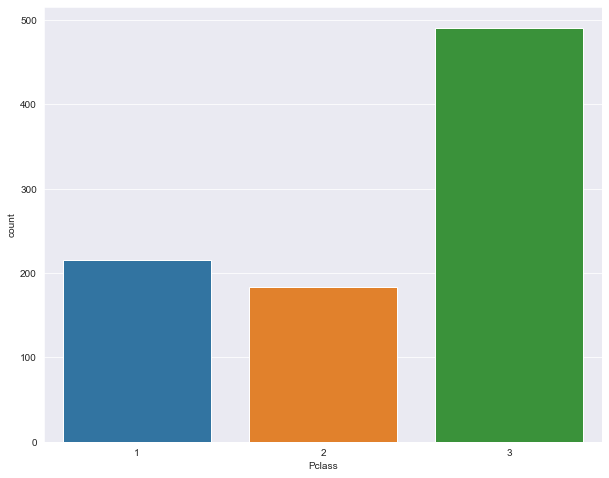

In [53]:
plt.figure(figsize=(10,8))
sns.countplot(data=train, x='Pclass')

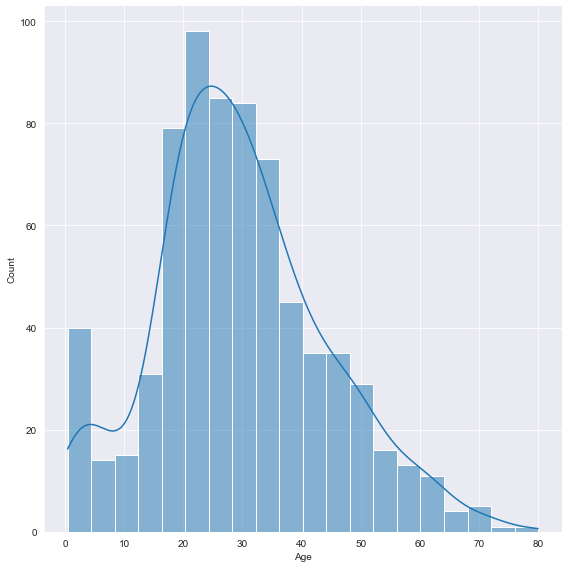

In [32]:
sns.displot(data=train, x='Age', kind='hist', height=8, kde=True)

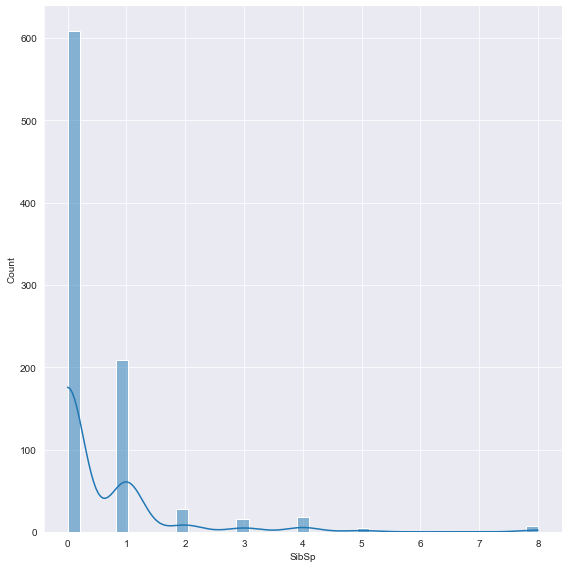

In [37]:
sns.displot(data=train, x='SibSp', kind='hist', kde=True, height=8)

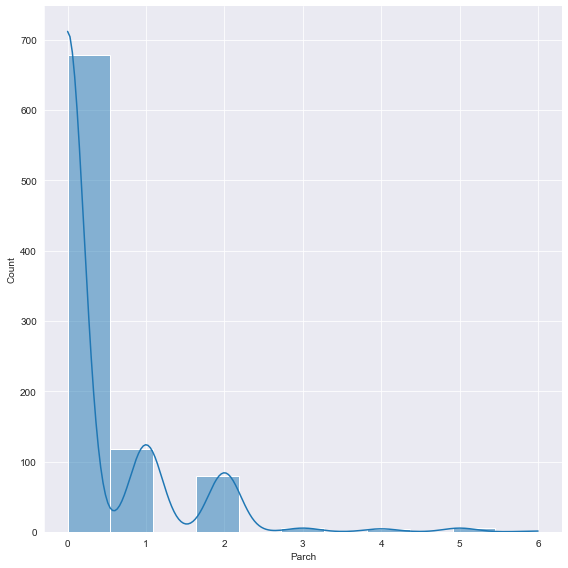

In [44]:
sns.displot(data=train, x='Parch', kind='hist', kde=True, height=8)

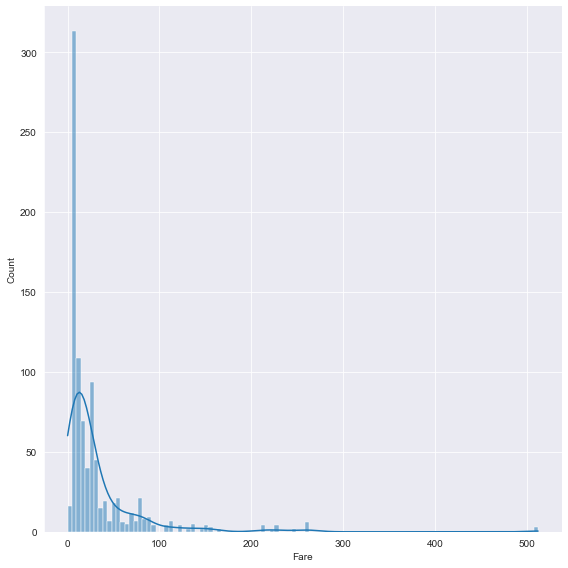

In [45]:
sns.displot(data=train, x='Fare', kind='hist', kde=True, height=8)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

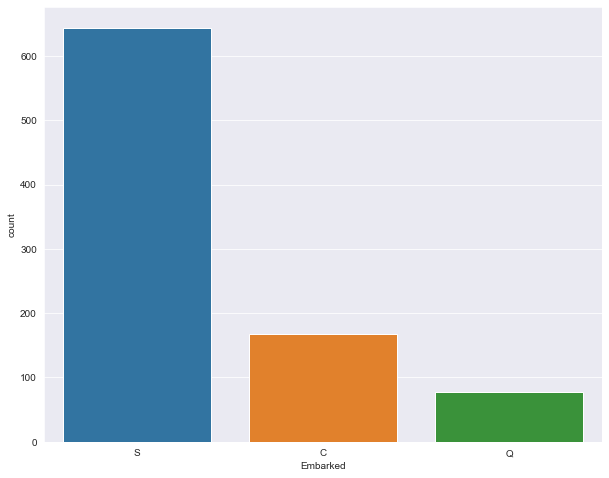

In [51]:
plt.figure(figsize=(10,8))
sns.countplot(data=train, x='Embarked')

<AxesSubplot:xlabel='Sex', ylabel='count'>

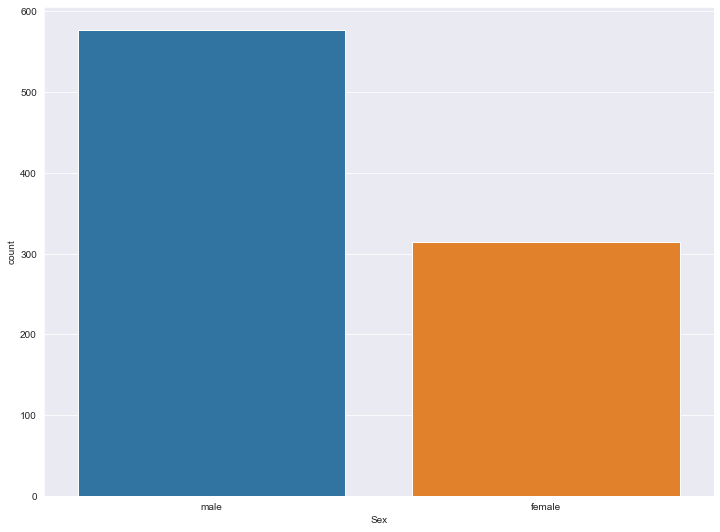

In [72]:
plt.figure(figsize=(12,9))
sns.countplot(data=train, x='Sex')

### Relation with the output variable 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

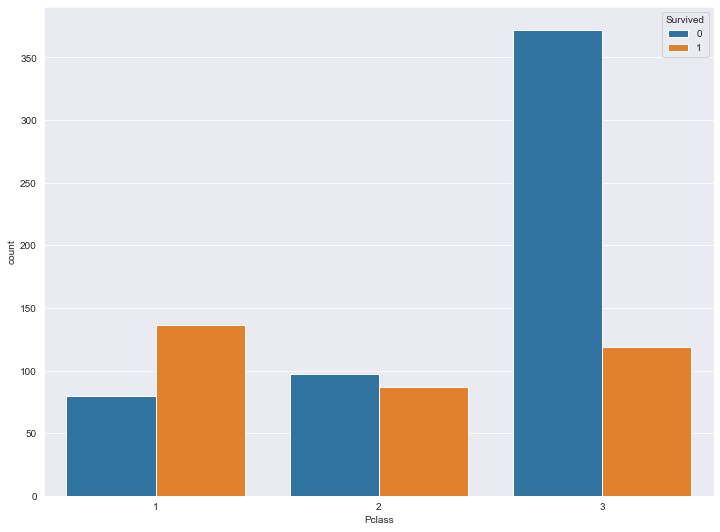

In [52]:
plt.figure(figsize=(12,9))
sns.countplot(data=train, x='Pclass', hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

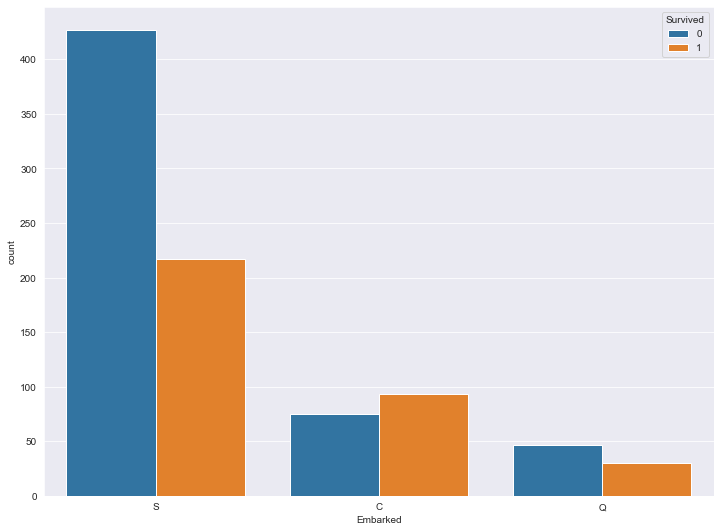

In [54]:
plt.figure(figsize=(12,9))
sns.countplot(data=train, x='Embarked',hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

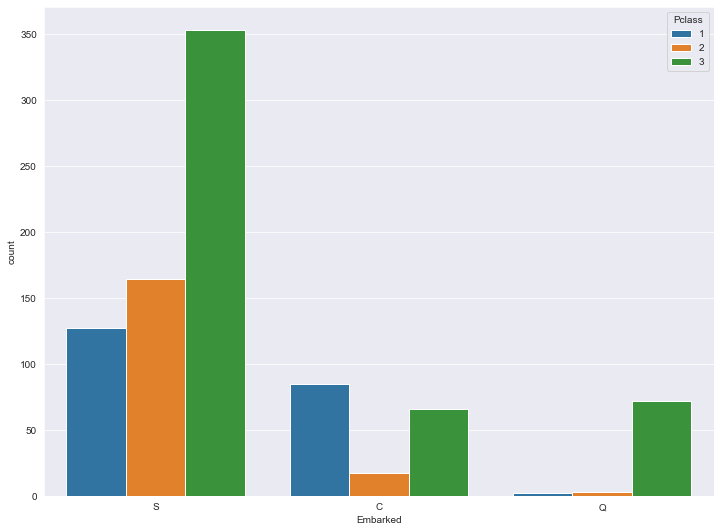

In [55]:
plt.figure(figsize=(12,9))
sns.countplot(data=train, x='Embarked',hue='Pclass')

<AxesSubplot:xlabel='Age', ylabel='Count'>

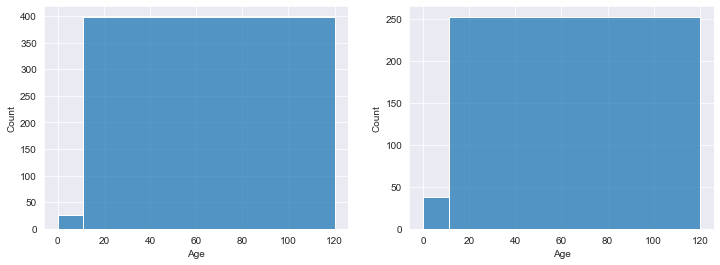

In [76]:
plt.figure(figsize=(12,9))
plt.subplot(221)
sns.histplot(data=train.loc[train['Survived']==0],x='Age',bins=[0,11,120])

plt.subplot(222)
sns.histplot(data=train.loc[train['Survived']==1],x='Age',bins=[0,11,120])

<AxesSubplot:xlabel='Sex', ylabel='count'>

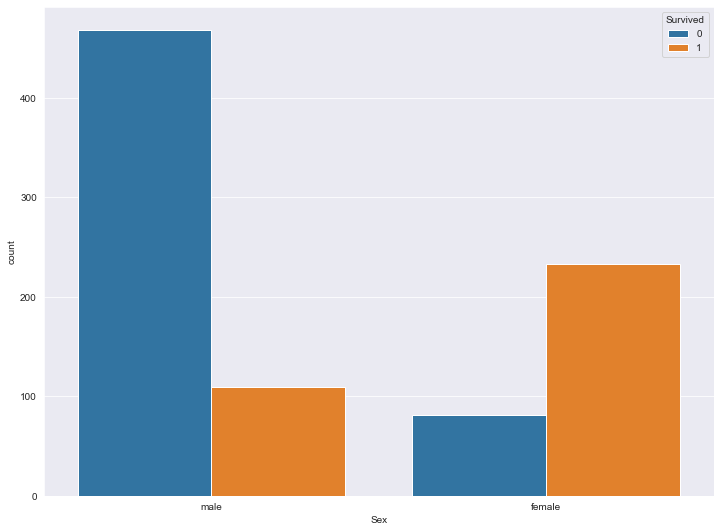

In [73]:
plt.figure(figsize=(12,9))
sns.countplot(data=train, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Sex'>

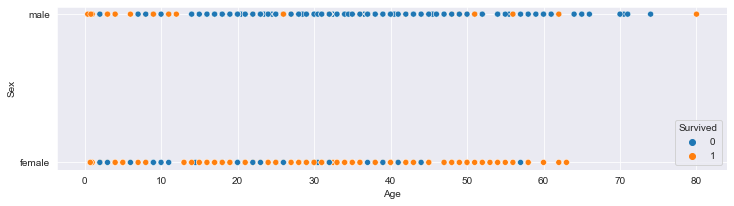

In [78]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=train, x='Age', y='Sex', hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='Count'>

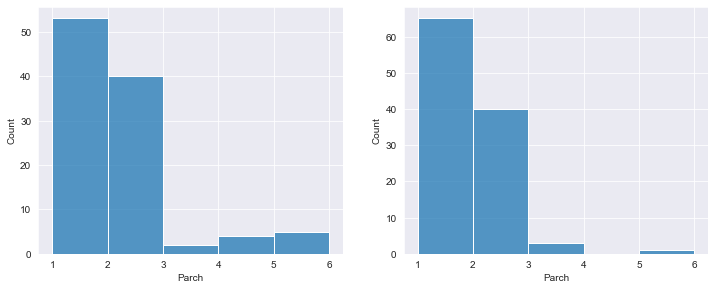

In [83]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.histplot(data=train.loc[train['Survived']==0],x='Parch',bins=[1,2,3,4,5,6])

plt.subplot(222)
sns.histplot(data=train.loc[train['Survived']==1],x='Parch',bins=[1,2,3,4,5,6])

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

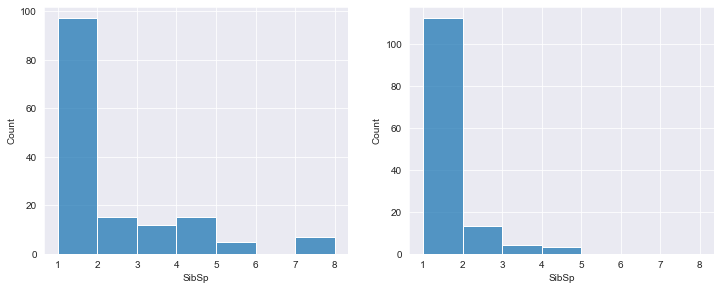

In [85]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.histplot(data=train.loc[train['Survived']==0],x='SibSp',bins=[1,2,3,4,5,6,7,8])

plt.subplot(222)
sns.histplot(data=train.loc[train['Survived']==1],x='SibSp',bins=[1,2,3,4,5,6,7,8])

## Preprocessing 

In [81]:
from sklearn.impute import SimpleImputer